-PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

-HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

-CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. -------Passengers in cryosleep are confined to their cabins.

-Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

-Destination - The planet the passenger will be debarking to.

-Age - The age of the passenger.

-VIP - Whether the passenger has paid for special VIP service during the voyage.

-RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

-Name - The first and last names of the passenger.

-Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Project Spaceship Titanic.ipynb',
 'README.md',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [2]:
data_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

display(data_df)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
display(data_df.describe())
print(data_df.info())
print(data_df.isnull().sum())

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             2

In [4]:
data_df = data_df.dropna()
print(data_df.isnull().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


In [5]:
data_df[["Deck","Num","Side"]] = data_df["Cabin"].str.split('/', expand=True)
data_df[["First Name", "Family"]] = data_df["Name"].str.split(' ', expand = True) 
data_df = data_df.drop(columns = ["Cabin","First Name","Name"])
data_df = data_df[['PassengerId', 'HomePlanet', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Family',
       'Transported']]

display(data_df)

,PassengerId,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Family,Transported
0,0001_01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Ofracculy,False
1,0002_01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Vines,True
2,0003_01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Susent,False
3,0003_02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Susent,False
4,0004_01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,98,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Noxnuther,False
8689,9278_01,Earth,True,G,1499,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Mondalley,False
8690,9279_01,Earth,False,G,1500,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Connon,True
8691,9280_01,Europa,False,E,608,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Hontichre,False


## Declarando funções úteis

In [6]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5*amplitude, q3 + 1.5*amplitude

def excluir_outliers(df,nome_coluna):
    n_linhas = df.shape[0]
    lim_inferior, lim_superior = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inferior) & (df[nome_coluna] <= lim_superior) , :]
    linhas_removidas = n_linhas - df.shape[0]
    return df, linhas_removidas

In [7]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15,5)
    sns.boxplot(x = coluna, ax = ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x = coluna,ax = ax2)

def histograma(coluna):
    plt.figure(figsize = (20, 10))
    sns.histplot(data =coluna,bins = 35, kde=True)
    
def grafico_barras(coluna):
    plt.figure(figsize = (15,5))
    ax = sns.barplot(x =coluna.value_counts().index ,y = coluna.value_counts())


<AxesSubplot:>

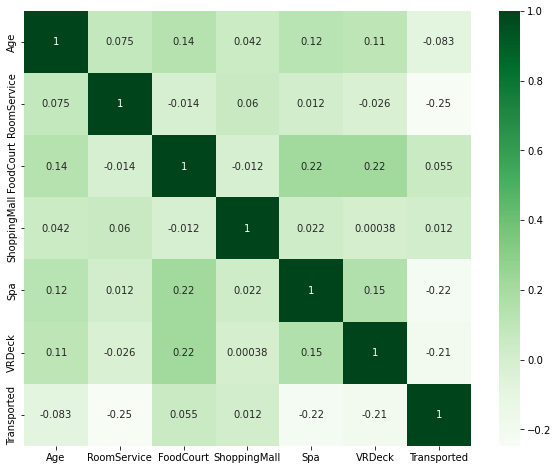

In [8]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(data_df.corr(), annot = True, cmap = "Greens")

# Ánalise individual das colunas

## Colunas contendo texto

### Home Planet

HomePlanet
Earth         3566
Europa        1673
Mars          1367
dtype: int64

None

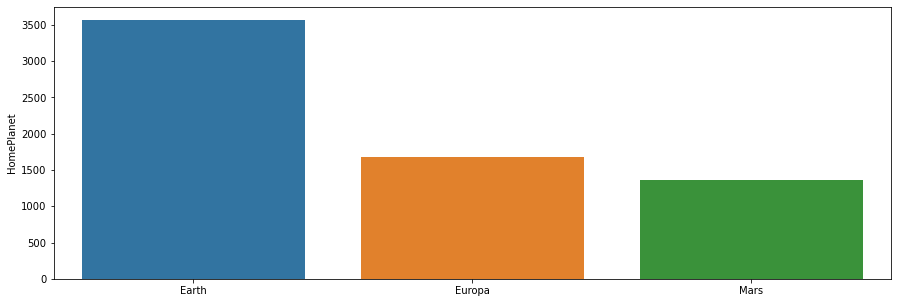

In [9]:
display(data_df[["HomePlanet"]].value_counts())
display(grafico_barras(data_df["HomePlanet"]))


### Deck

F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: Deck, dtype: int64

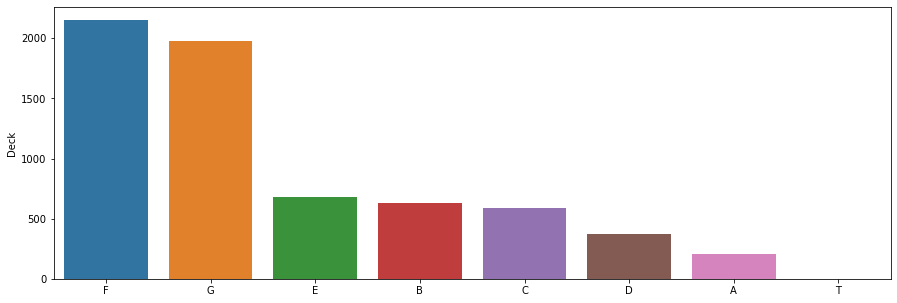

In [10]:
display(data_df["Deck"].value_counts())
plt.figure(figsize = (15,5))
ax = sns.barplot(x = data_df["Deck"].value_counts().index, y = data_df["Deck"].value_counts())

In [11]:
Other_decks = []

for Deck_type in data_df["Deck"].value_counts().index:
    if data_df["Deck"].value_counts()[Deck_type] < 400:
        Other_decks.append(Deck_type)

for Deck_type in Other_decks:
    data_df.loc[data_df["Deck"] == Deck_type, "Deck"] = "Others"
    
display(data_df["Deck"].value_counts())

F         2152
G         1973
E          683
B          628
C          587
Others     583
Name: Deck, dtype: int64

### Side


In [12]:
display(data_df["Side"].value_counts())

S    3345
P    3261
Name: Side, dtype: int64

Como existem apenas 2 tipos nessa coluna ela poderá ser lida como um a coluna booleana

### Destination

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64

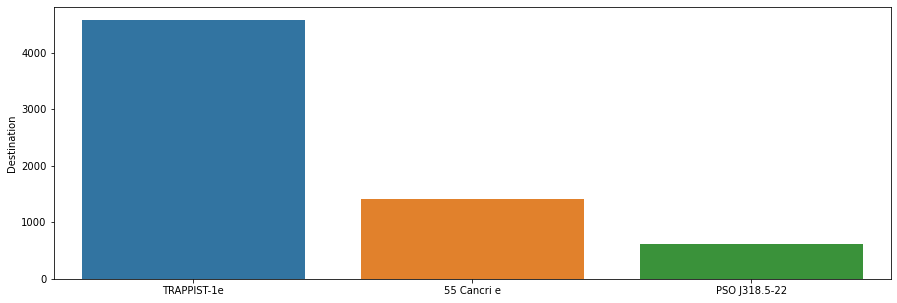

In [13]:
display(data_df["Destination"].value_counts())
plt.figure(figsize = (15,5))
ax = sns.barplot(x = data_df["Destination"].value_counts().index, y = data_df["Destination"].value_counts())

### Family

In [14]:
display(data_df["Family"].value_counts())

Casonston    17
Oneiles      15
Garnes       13
Domington    13
Litthews     13
             ..
Cheen         1
Dicomeng      1
Cotik         1
Tertchty      1
Ofracculy     1
Name: Family, Length: 2112, dtype: int64

Como nessa coluna exise um número muito grande de tipos e nenhum deles tem um número significativo para o modelo, foi decidido por retirar essa coluna do modelo

In [15]:
data_df = data_df.drop(columns = ["Family"])
display(data_df)

,PassengerId,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,Others,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,Others,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,Others,98,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G,1499,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G,1500,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E,608,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


## Colunas contendo números

### Num

In [16]:
display(data_df["Num"].value_counts())

82      22
97      19
56      19
176     18
65      17
        ..
759      1
832      1
1554     1
663      1
878      1
Name: Num, Length: 1734, dtype: int64

### Age

None

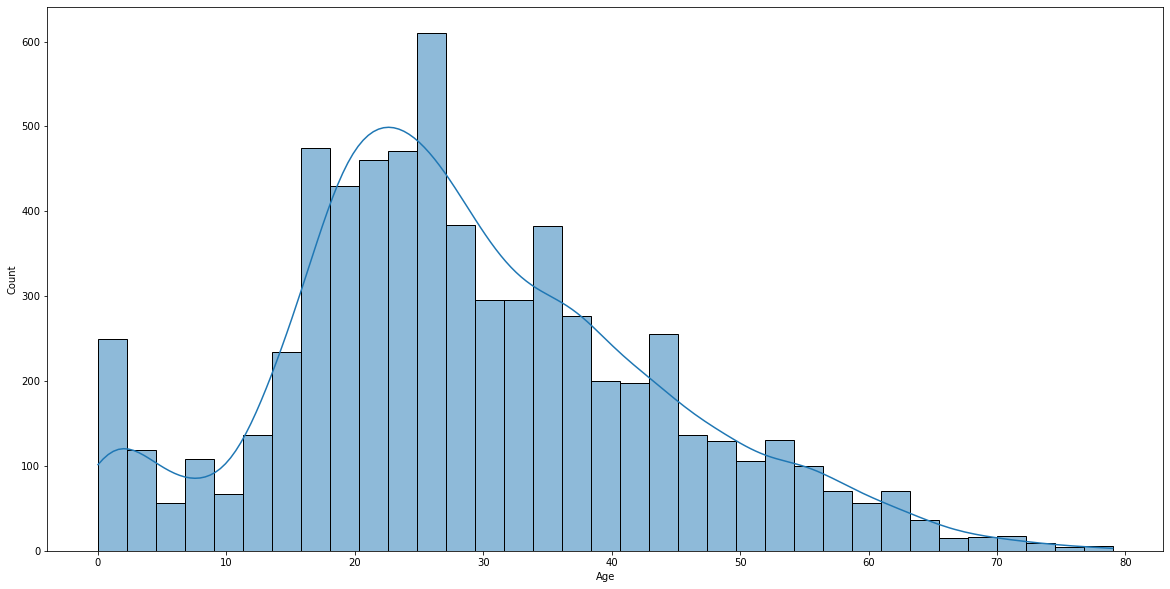

In [17]:
display(histograma(data_df["Age"]))

### Room Service

None

0.0       4318
1.0         93
2.0         60
3.0         43
4.0         35
          ... 
378.0        1
1065.0       1
260.0        1
1633.0       1
745.0        1
Name: RoomService, Length: 1093, dtype: int64

222.99167423554346


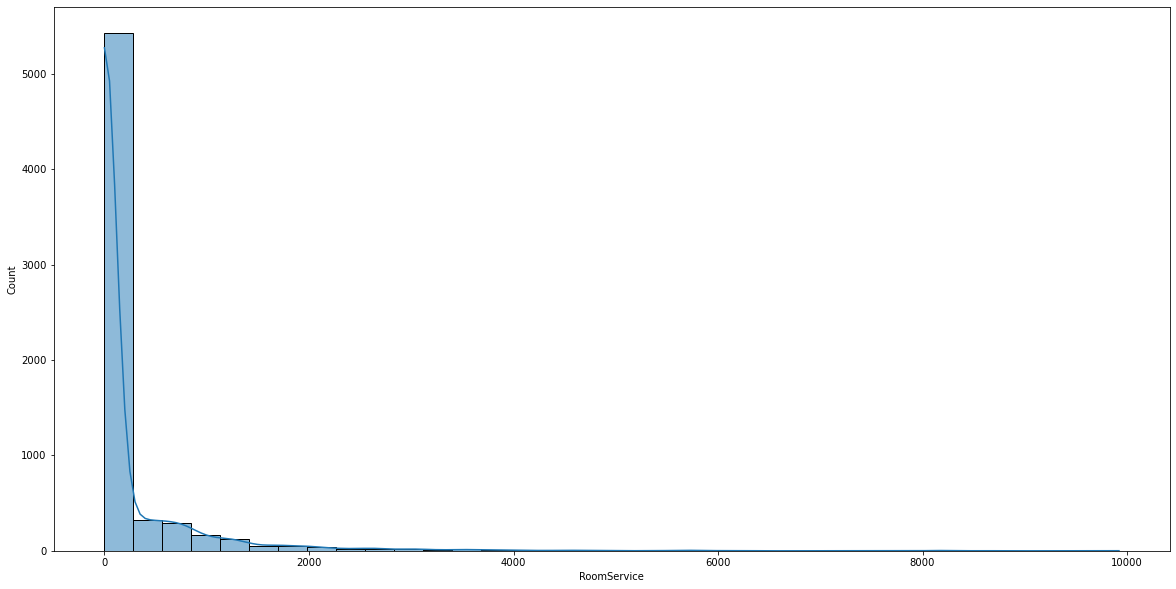

In [18]:
display(histograma(data_df["RoomService"]))

display(data_df["RoomService"].value_counts())
media_RoomService = data_df["RoomService"].mean()
print(media_RoomService)

Como os valores são em sua enorme maioria nulos foi decidido por considerar os valores acima da média como sendo 1 e os menores igual a 0.

In [19]:
data_df.loc[data_df["RoomService"] < media_RoomService, "RoomService"] = int(0)
data_df.loc[data_df["RoomService"] > media_RoomService, "RoomService"] = int(1)

           
display(data_df["RoomService"].value_counts())

0.0    5355
1.0    1251
Name: RoomService, dtype: int64

### Food Court

None

0.0        4241
1.0          83
2.0          47
4.0          38
3.0          37
           ... 
3157.0        1
2333.0        1
3439.0        1
10679.0       1
4688.0        1
Name: FoodCourt, Length: 1293, dtype: int64

478.9585225552528


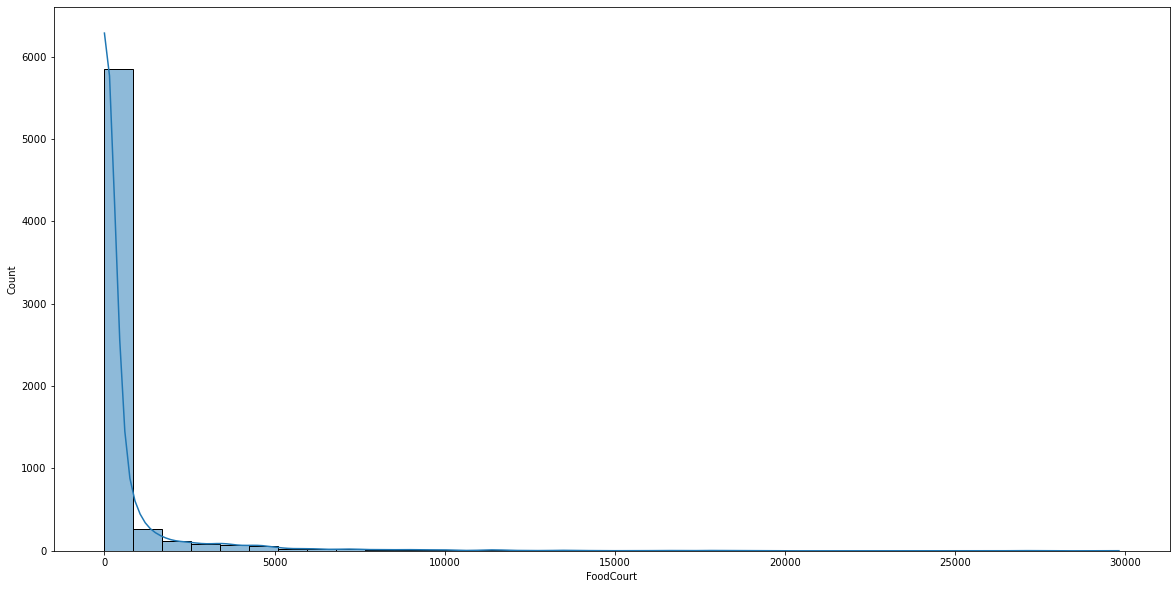

In [20]:
display(histograma(data_df["FoodCourt"]))

display(data_df["FoodCourt"].value_counts())
media_FoodCourt = data_df["FoodCourt"].mean()
print(media_FoodCourt)

In [21]:
data_df.loc[data_df["FoodCourt"] < media_FoodCourt, "FoodCourt"] = int(0)
data_df.loc[data_df["FoodCourt"] > media_FoodCourt, "FoodCourt"] = int(1)

           
display(data_df["FoodCourt"].value_counts())

0.0    5476
1.0    1130
Name: FoodCourt, dtype: int64

### Shopping Mall

0.0       4332
1.0        130
2.0         57
3.0         43
4.0         37
          ... 
777.0        1
701.0        1
3627.0       1
186.0        1
1872.0       1
Name: ShoppingMall, Length: 984, dtype: int64

None

178.35649409627612


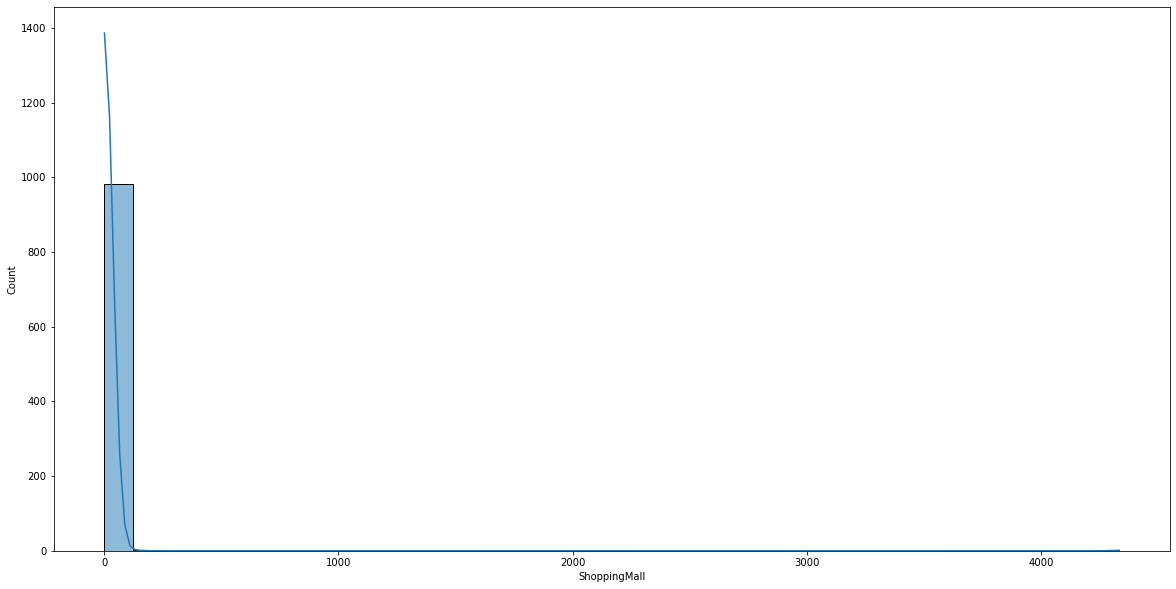

In [22]:
display(data_df["ShoppingMall"].value_counts())
display(histograma(data_df["ShoppingMall"].value_counts()))

print(data_df["ShoppingMall"].mean())

media_ShoppingMall = data_df["ShoppingMall"].mean()

In [23]:
data_df.loc[data_df["ShoppingMall"] < media_ShoppingMall, "ShoppingMall"] = int(0)
data_df.loc[data_df["ShoppingMall"] > media_ShoppingMall, "ShoppingMall"] = int(1)

           
display(data_df["ShoppingMall"].value_counts())

0.0    5425
1.0    1181
Name: ShoppingMall, dtype: int64

### Spa

0.0       4109
1.0        113
2.0         80
5.0         44
3.0         44
          ... 
1792.0       1
330.0        1
1924.0       1
3440.0       1
1643.0       1
Name: Spa, Length: 1143, dtype: int64

None

313.16151983045717


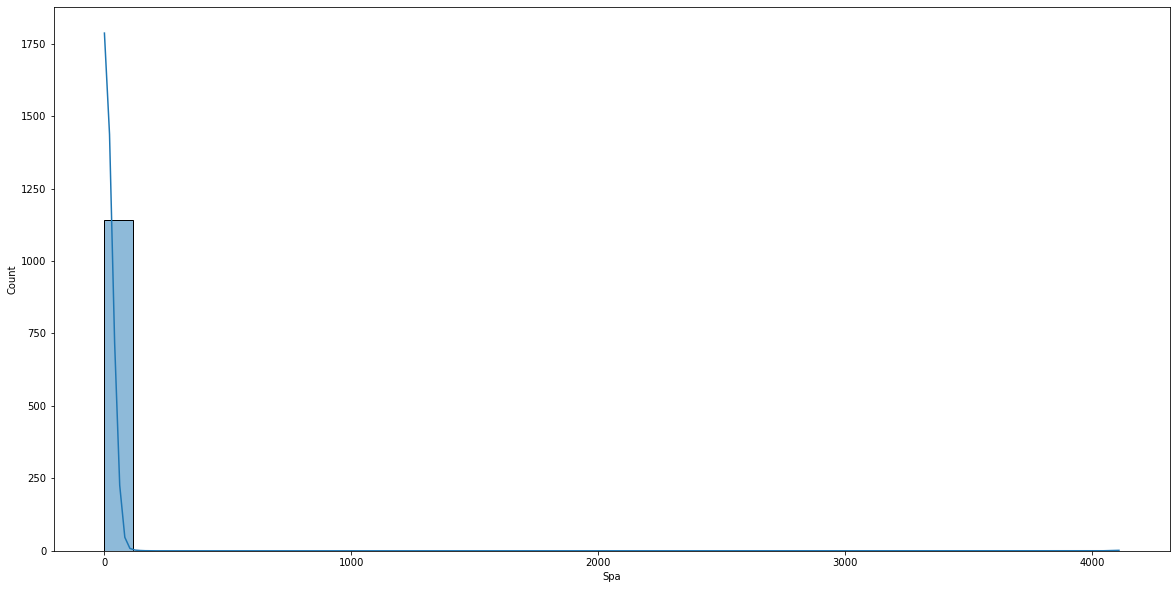

In [24]:
display(data_df["Spa"].value_counts())
display(histograma(data_df["Spa"].value_counts()))

print(data_df["Spa"].mean())

media_Spa = data_df["Spa"].mean()

In [25]:
data_df.loc[data_df["Spa"] < media_Spa, "Spa" ] = int(0)
data_df.loc[data_df["Spa"] > media_Spa, "Spa" ] = int(1)

display(data_df["Spa"].value_counts())

0.0    5484
1.0    1122
Name: Spa, dtype: int64

### VR Deck

0.0       4241
1.0        111
2.0         54
3.0         47
4.0         36
          ... 
5689.0       1
4376.0       1
598.0        1
972.0        1
3235.0       1
Name: VRDeck, Length: 1106, dtype: int64

None

303.78004844081136


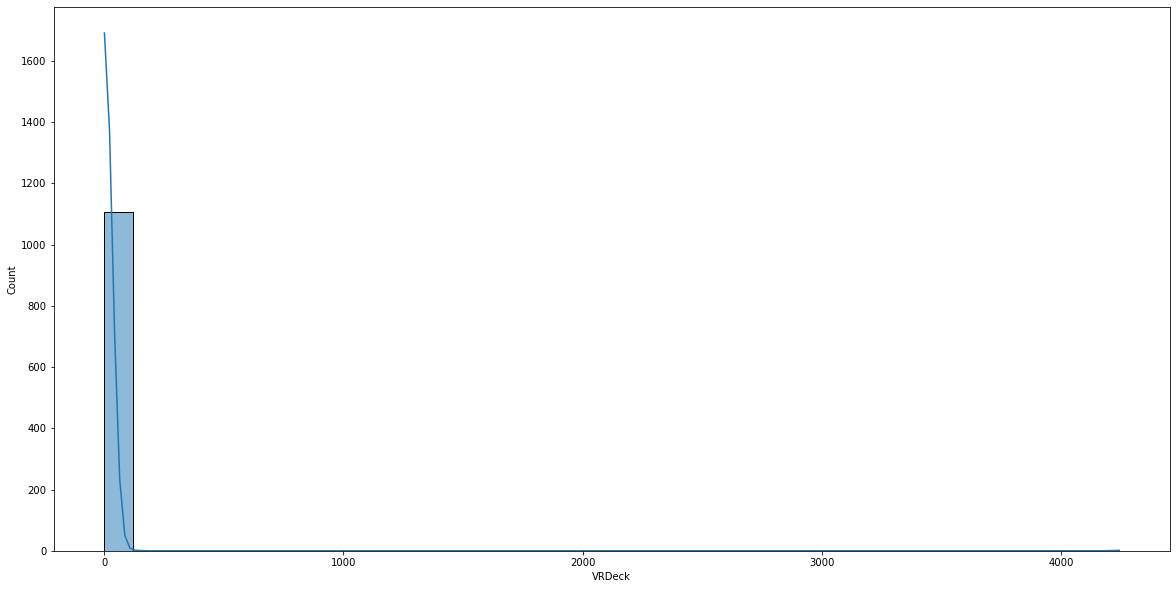

In [26]:
display(data_df["VRDeck"].value_counts())
display(histograma(data_df["VRDeck"].value_counts()))

print(data_df["VRDeck"].mean())

media_VRDeck = data_df["VRDeck"].mean()

In [27]:
data_df.loc[data_df["VRDeck"] < media_VRDeck, "VRDeck"] = int(0)
data_df.loc[data_df["VRDeck"] > media_VRDeck, "VRDeck"] = int(1)

           
display(data_df["VRDeck"].value_counts())

0.0    5463
1.0    1143
Name: VRDeck, dtype: int64

## Colunas valores de verdadeiro e falso

### Cryo Sleep

False    4274
True     2332
Name: CryoSleep, dtype: int64

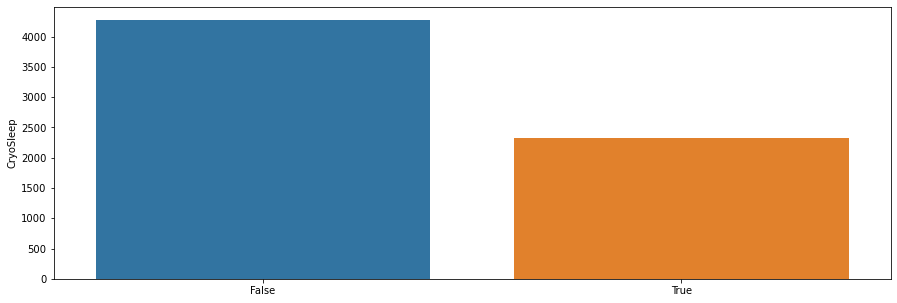

In [28]:
display(data_df["CryoSleep"].value_counts())
plt.figure(figsize = (15,5))
ax = sns.barplot(x = data_df["CryoSleep"].value_counts().index, y = data_df["CryoSleep"].value_counts())

### VIP

False    6444
True      162
Name: VIP, dtype: int64

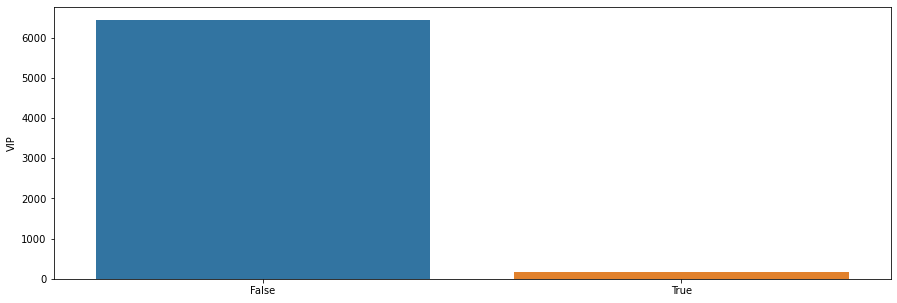

In [29]:
display(data_df["VIP"].value_counts())
plt.figure(figsize = (15,5))
ax = sns.barplot(x = data_df["VIP"].value_counts().index, y = data_df["VIP"].value_counts())